# Assignment Week 8
## Group Assignment (Group 10)

#### 1. The following table shows the annual atmospheric CO2 concentration (in parts permillion) in Antarctica. Fit a straight line to the data and determine the average increase of the concentration per year.

| $\ $ | $\ $ | $\ $  |  $\ $ | $\ $ |  $\ $  |$\ $  |   $\ $    | $\ $       |
| ---- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Year | 1994  | 1995  | 1996  | 1997  | 1998  | 1999  | 2000  | 2001  |
| ppm  | 356.8 | 358.2 | 360.3 | 361.8 | 364.0 | 365.7 | 366.7 | 368.2 |
| Year | 2002  | 2003  | 2004  | 2005  | 2006  | 2007  | 2008  | 2009  |
| ppm  | 370.5 | 372.2 | 374.9 | 376.7 | 378.7 | 381.0 | 382.9 | 384.7 |

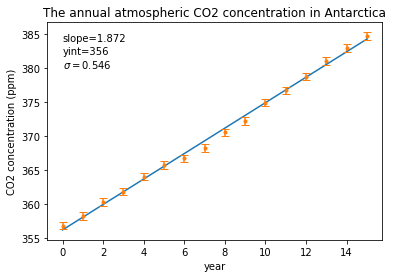

The average increase of the concentration per year is about 1.872 ppm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def lineFit(x, y):
    xavg = x.mean()
    
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    
    S = sum((y - slope * x - yint)**2)  # residuals
    sigma = np.sqrt(S / (len(x) - 2))  # standard deviation
    
    return slope, yint, sigma

# data
year=np.array([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009])
ppm=np.array([356.8,358.2,360.3,361.8,364.0,365.7,366.7,368.2,370.5,372.2,374.9,376.7,378.7,381.0,382.9,384.7])

year = year - 1994 * np.ones(len(year))  # normalize the years

a, b, sigma = lineFit(year,ppm)

y = lambda x: a*year+b

# plot the result
plt.title('The annual atmospheric CO2 concentration in Antarctica')
plt.xlabel('year')
plt.ylabel('CO2 concentration (ppm)')
plt.plot(year,y(year))
plt.errorbar(year, ppm, yerr=sigma*np.ones(len(year)), fmt='.', capsize=4)
plt.text(0, 384, 'slope=%.3f' % a)
plt.text(0, 382, 'yint=%.0f' % b)
plt.text(0, 380, r'$\sigma=%.3f$' % sigma)
plt.show()

print('The average increase of the concentration per year is about {:.3f} ppm.'.format(a))

#### 2. Implement the method of normal equations to determine $a$ and $b$ for which $f (x) = a \sin(\pi x/2) +b \cos(\pi x/2)$ fits the following data in the least-squares sense.
|  $\ $    |     $\ $   |  $\ $      |    $\ $    |   $\ $     |   $\ $     |      $\ $ |
| ---- | ------ | ------ | ------ | ------ | ------ | ----- |
| x    | −0.5   | −0.19  | 0.02   | 0.20   | 0.35   | 0.50  |
| y    | −3.558 | −2.874 | −1.995 | −1.040 | −0.068 | 0.677 |


#### Compare your results with those from QR factorization. 

Solve
$$
\begin{pmatrix}
\sum_i\limits\sin\left(\dfrac{\pi x_i}{2}\right)^2 &\sum_i\limits\sin\left(\dfrac{\pi x_i}{2}\right)\cos\left(\dfrac{\pi x_i}{2}\right)\\
\sum_i\limits \sin\left(\dfrac{\pi x_i}{2}\right)\cos\left(\dfrac{\pi x_i}{2}\right)&\sum_i\limits\cos\left(\dfrac{\pi x_i}{2}\right)^2\\
\end{pmatrix}
\left(
\begin{matrix}
a\\
 \\
b\\
\end{matrix}
\right)
=
\begin{pmatrix}
\sum_i\limits\sin\left(\dfrac{\pi x_i}{2}\right)y_i\\
\sum_i\limits\cos\left(\dfrac{\pi x_i}{2}\right)y_i\\
\end{pmatrix}
 $$

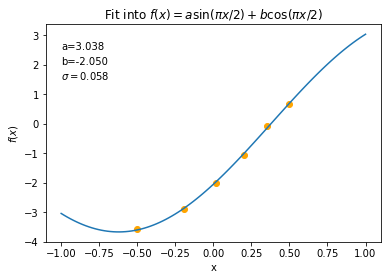

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# data
x=np.array([-0.5,-0.19,0.02,0.20,0.35,0.50])
y=np.array([-3.558,-2.874,-1.995,-1.040,-0.068,0.677])

A = np.zeros([2,2])
A[0][0] = sum(np.sin(np.pi*x/2)**2)
A[1][0] = A[0][1]=sum(np.sin(np.pi*x/2)*np.cos(np.pi*x/2))
A[1][1] = sum(np.cos(np.pi*x/2)**2) 

b = np.array([sum(y*np.sin(np.pi*x/2)), sum(y*np.cos(np.pi*x/2))])

a, b1 = np.linalg.solve(A, b)  # solve Av=b

f = lambda x: a * np.sin(np.pi * x / 2) + b1 * np.cos(np.pi * x / 2)  # the fitting function

S = sum((f(x) - y)**2)  # residuals
sigma = np.sqrt(S / (len(x) - 2))  # standard deviation

plt.title(r'Fit into $f (x) = a \sin(\pi x/2) +b \cos(\pi x/2)$')
plt.xlabel('x')
plt.ylabel(r'$f(x)$')
x_range = np.linspace(-1, 1, 100)
plt.plot(x_range, f(x_range))
plt.scatter(x, y, color='orange')
plt.text(-1, 2.5, 'a=%.3f' % a)
plt.text(-1, 2.0, 'b=%.3f' % b1)
plt.text(-1, 1.5, r'$\sigma=%.3f$' % sigma)
plt.show()

Now we use QR factorization. Solve
$$
\begin{pmatrix}
\sin(\pi x_1/2) & \cos(\pi x_1/2)\\
\sin(\pi x_2/2) & \cos(\pi x_2/2)\\
\cdots & \cdots\\
\sin(\pi x_6/2) & \cos(\pi x_6/2)
\end{pmatrix}
\begin{pmatrix}
a\\
\ \\
b
\end{pmatrix}
=
\begin{pmatrix}
y_1\\
y_2\\
\cdots\\
y_6
\end{pmatrix}
$$

or
$$
\mathbf{B}\mathbf{v}=\mathbf{y}
$$

In [3]:
B = np.array([[np.sin(np.pi * x[i] / 2), np.cos(np.pi * x[i] / 2)] for i in range(6)])    

Q, R = np.linalg.qr(B)  # QR factorization

a, b1 = np.linalg.solve(R,Q.T@y)  # solve R@v=Q.T@y

print('a = %.3f' % a)
print('b = %.3f' % b1)

f = lambda x: a * np.sin(np.pi * x / 2) + b1 * np.cos(np.pi * x / 2)  # the fitting function

S = sum((f(x) - y)**2)  # residuals

print('[Residuals] = %.4f' % S)

# calculate the norm square of the lower part of Q.T@y
Q1, R1 = np.linalg.qr(B,'complete')
b = Q1.T@y
norm_lower_b = np.linalg.norm(b[2:], ord=2)**2

print('[Norm square of the lower part of Q.T@y] = %.4f' % norm_lower_b)

a = 3.038
b = -2.050
[Residuals] = 0.0136
[Norm square of the lower part of Q.T@y] = 0.0136


We got the same result from QR factorization. And we had checked that the norm square of the lower part of $\mathbf{Q^T y}$ that isn't used to determine the parameters is just the residuals, around 0.0136.

#### 3. Linear regression can be extended to data that depend on two or more variables (called multiple linear regression).

#### Instead of a straight line, the fitting function now represents a plane:
$$
f (x, y) = a +bx + cy
$$

(1) **Show** that the normal equations for the coefficients are
$$
    \begin{pmatrix}
    n &\sum x_i &\sum y_i\\
    \sum x_i &\sum x_i^2 &\sum x_i y_i\\
    \sum y_i &\sum x_i y_i &\sum y^2_i
    \end{pmatrix}\begin{pmatrix}
    a\\   b\\   c
    \end{pmatrix}\begin{pmatrix}
    \sum z_i\\
    \sum x_iz_i\\
    \sum y_iz_i\end{pmatrix}
$$

**Answer**:
$$
  \begin{aligned}
  S &=\displaystyle\sum_{i=1}^N\left[z_i-a-bx_i-cy_i\right]^2
  \end{aligned}
$$
$$
  \begin{aligned}
  \frac{\partial S}{\partial a}=-2\displaystyle\sum_{i=1}^N \left[z_i-a-bx_i-cy_i\right]=0
  \end{aligned}
$$
$$
  \begin{aligned}
  \frac{\partial S}{\partial b}=-2\displaystyle\sum_{i=1}^N \left[x_iz_i-ax_i-bx_i^2-cx_iy_i\right]=0
  \end{aligned}
$$
$$
  \begin{aligned}
  \frac{\partial S}{\partial c}=-2\displaystyle\sum_{i=1}^N \left[y_iz_i-ay_i-bx_iy_i-cy_i^2\right]=0
  \end{aligned}
$$
Thus,
 $$
        \begin{pmatrix}
        n &\sum x_i &\sum y_i\\
        \sum x_i &\sum x_i^2 &\sum x_i y_i\\
        \sum y_i &\sum x_i y_i &\sum y^2_i
        \end{pmatrix}\begin{pmatrix}
        a\\   b\\   c
        \end{pmatrix}
        =
        \begin{pmatrix}
        \sum z_i\\
        \sum x_iz_i\\
        \sum y_iz_i\end{pmatrix}
        $$

(2) **Determine** $a,b$ and $c$ to fit the following data:    
    

| x    | y    | z    |
| ---- | ---- | ---- |
| 0    | 0    | 1.42 |
| 0    | 1    | 1.85 |
| 1    | 0    | 0.78 |
| 2    | 0    | 0.18 |
| 2    | 1    | 0.60 |
| 2    | 2    | 1.05 |

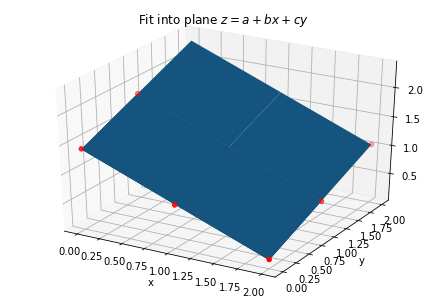

a = 1.41
b = -0.62
c = 0.44


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# data
x=np.array([0,0,1,2,2,2])
y=np.array([0,1,0,0,1,2])
z=np.array([1.42,1.85,0.78,0.18,0.60,1.05])

A=np.zeros([3,3])
A[0][0] = len(x)
A[1][1] = sum(x**2)
A[2][2] = sum(y**2)
A[1][0] = A[0][1] = sum(x)
A[2][0] = A[0][2] = sum(y)
A[2][1] = A[1][2] = sum(x * y)

b1 = np.array([sum(z), sum(z * x), sum(z * y)])

a, b ,c = np.linalg.solve(A, b1)  # solve Av=b

def z_f(x, y):
    return a + b * x + c * y

fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(x, y)
Z = z_f(X, Y)
ax.scatter(x, y, z, color='r')
ax.plot_surface(X, Y, Z)
plt.title(r'Fit into plane $z=a+bx+cy$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('a = %.2f' % a)
print('b = %.2f' % b)
print('c = %.2f' % c)

#### 4. The data, including the uncertainties in the $y$ values, are provided in the data file *absorption_spectrum.txt*. Your task is to fit the function
$$
d(t) = A(1 + B\cos\omega t) e^{-t^2/2\tau^2} +C  \tag{1}
$$
#### to the data, where the fitting parameters are $A,B,C, \omega$, and $\tau$.

(1) **Write** a Python program that 

  - reads the data in from a data file, 
  - defines a function `oscDecay(t, A, B, C, tau, omega)` for the function $d(t)$ above, and 
  - produces a plot of the data and the function $d(t)$. 
  
Choose the fitting parameters $A,B, C, \tau$, and $\omega$ to produce an approximate fit "by eye" to the data.

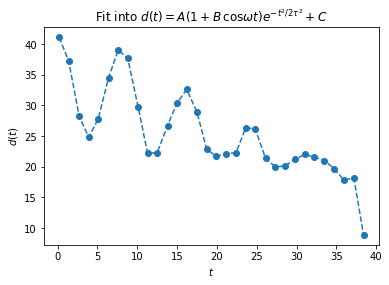

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('absorption_spectrum.txt', skiprows=4)

def oscDecay(t, A, B, C, tau, omega):
    return A * (1 + B * np.cos(omega*t)) * np.exp(-t**2 / 2 / tau**2) + C

def plot(data, f=None):
    plt.title(r'Fit into $d(t)=A(1+B\,\cos\omega t)e^{-t^2/2\tau^2}+C$')
    plt.plot(data[:, 0], data[:, 1], 'o--')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$d(t)$')
    if f != None:
        x = np.linspace(data[0][0], data[-1][0], 1000)
        plt.plot(x, f(x))
    pass

plot(data)
plt.show()

Due to $d(\infty) = C$, we estimate $C\approx 15$. From the plot, we can see that the period $T\approx 8$, indicating that $\omega=\dfrac{2\pi}{T}\approx\dfrac{2\pi}{8}$.The parameter $A$ implies the deviation of the center of the oscillation from the $x$ axis near $t=0$, except for the contribution of $C$. So $A\approx 32-C=17$. Applying $d(0) = A(1 + B) + C\approx 40$, we obtain $B\approx 0.5$. When $t=\tau$, $e^{-t^2/2\tau^2}=e^{-1/2}\approx 0.6$. We find that when $t\approx 20$, the function decays to about 60%, so we take $\tau\approx 20$.

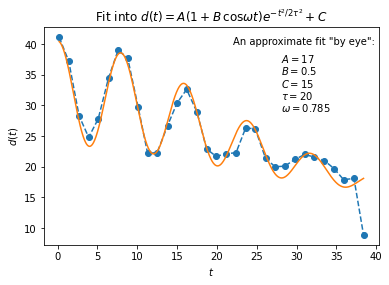

In [2]:
A = 17
B = 0.5
C = 15
tau = 20
omega = 2 * np.pi / 8

f = lambda t: oscDecay(t, A, B, C, tau, omega)

plot(data, f)
plt.text(22, 40, 'An approximate fit "by eye":')
plt.text(28, 37, r'$A=%.0f$' % (A))
plt.text(28, 35, r'$B=%.1f$' % (B))
plt.text(28, 33, r'$C=%.0f$' % (C))
plt.text(28, 31, r'$\tau=%.0f$' % (tau))
plt.text(28, 29, r'$\omega=%.3f$' % (omega))
plt.show()

(2) **Follow** the example `FitSpectrum1.py`, write a program using `scipy.optimize.curve_fit` to fit Eq. (1) to the data and thus find the optimal values of the fitting parameters $A,B,C,\omega$, and $\tau$. 

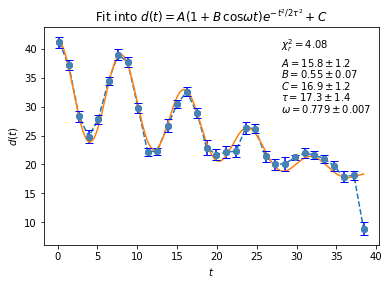

In [3]:
from scipy.optimize import curve_fit

p0 = [20, 0.5, 15, 20, 2 * np.pi / 8]  # the starting values
opt, cov = curve_fit(oscDecay, data[:, 0], data[:, 1], p0, sigma=data[:, 2])

[A, B, C, tau, omega] = opt  # the fitting parameters

err = np.sqrt(np.diag(cov))  # the error of the parameters

f = lambda t: oscDecay(t, A, B, C, tau, omega)
S = data[:, 1] - f(data[:, 0])  # the residuals
chisq = sum((S / data[:, 2]) ** 2)  # chi square
redchisq = chisq / (len(data)-5)  # reduced chi square

plot(data, f)
plt.errorbar(data[:, 0], data[:, 1], yerr=data[:, 2], fmt='o', color='steelblue', ecolor='b', capsize=4)
plt.text(28, 40, r'$\chi_r^2=%.2f$' % redchisq)
plt.text(28, 37, r'$A=%.1f\pm %.1f$' % (A, err[0]))
plt.text(28, 35, r'$B=%.2f\pm %.2f$' % (B, err[1]))
plt.text(28, 33, r'$C=%.1f\pm %.1f$' % (C, err[2]))
plt.text(28, 31, r'$\tau=%.1f\pm %.1f$' % (tau, err[3]))
plt.text(28, 29, r'$\omega=%.3f\pm %.3f$' % (omega, err[4]))
plt.show()

(3) **Once** you have found the optimal fitting parameters, run your fitting program again using for starting values the optimal values of the fitting parameters $A,B,C$ and $\tau$, but set the starting value of $\omega$ to be 3 times the optimal value. 

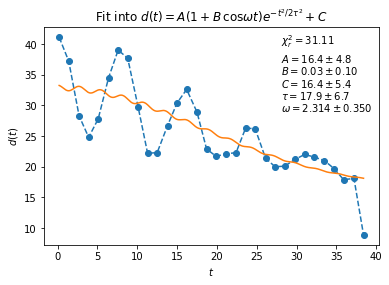

In [4]:
p0 = [A, B, C, tau, 3 * omega]  # the starting values
opt, cov = curve_fit(oscDecay, data[:, 0], data[:, 1], p0, sigma=data[:, 2])

[A1, B1, C1, tau1, omega1] = opt  # the fitting parameters

err = np.sqrt(np.diag(cov))  # the error of the parameters

f = lambda t: oscDecay(t, A1, B1, C1, tau1, omega1)

S1 = data[:, 1] - f(data[:, 0])  # the residuals
chisq1 = sum((S1 / data[:, 2]) ** 2)  # chi square
redchisq1 = chisq1 / (len(data)-5)  # reduced chi square

plot(data, f)
plt.text(28, 40, r'$\chi_r^2=%.2f$' % redchisq1)
plt.text(28, 37, r'$A=%.1f\pm %.1f$' % (A1, err[0]))
plt.text(28, 35, r'$B=%.2f\pm %.2f$' % (B1, err[1]))
plt.text(28, 33, r'$C=%.1f\pm %.1f$' % (C1, err[2]))
plt.text(28, 31, r'$\tau=%.1f\pm %.1f$' % (tau1, err[3]))
plt.text(28, 29, r'$\omega=%.3f\pm %.3f$' % (omega1, err[4]))
plt.show()

Obvously this is a bad fit. $\chi^2_r$ is very large.

(4) **Setting** the fitting parameters $A,B,C$ and $\tau$ to the optimal values you found in part (2), plot $\chi^2_r$ as a function of $\omega$ for $\omega$ spanning the range from 0.05 to 3.95. You should observe several local minima for different values of $\chi^2_r$; the global minimum in $\chi^2_r$ should occur for the optimal value of $\omega$ you found in part (2).

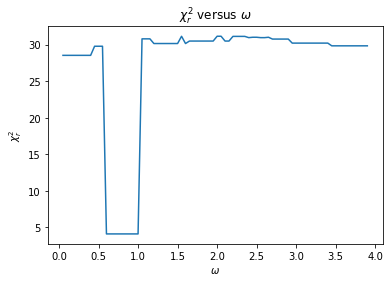

In [5]:
def redchi2(omega):
    p0 = [A, B, C, tau, omega]  # the starting values
    opt, cov = curve_fit(oscDecay, data[:, 0], data[:, 1], p0, sigma=data[:, 2])

    [A1, B1, C1, tau1, omega1] = opt  # the fitting parameters

    f = lambda t: oscDecay(t, A1, B1, C1, tau1, omega1)
    S = data[:, 1] - f(data[:, 0])  # the residuals
    chisq = sum((S / data[:, 2]) ** 2)  # chi square
    redchisq = chisq / (len(data)-5)  # reduced chi square
    
    return redchisq

omegas = np.arange(0.05, 3.95, 0.05)
redchi2s = [redchi2(omega) for omega in omegas]

# plot chi square versus omega
plt.title(r'$\chi^2_r$ versus $\omega$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\chi_r^2$')
plt.plot(omegas, redchi2s)
plt.show()

#### 5. A lot of technology, especially most types of digital audio devices for processing sound, is based on representing a signal of time as a sum of sine functions. Say the signal is some function $f (t)$ on the interval $[−\pi, \pi]$ (or generally $[a,b]$). Instead of working with $f (t)$ directly, we approximate f by the sum
$$
S_N(t)=\sum_{n=1}^Nb_n\sin(nt)
$$
#### where the coefficients $b_n$ must be adjusted such that $S_N(t)$ is a good approximation to $f (t)$. We shall in this exercise adjust $bn$ by a trial-and-error process.

(1) **Make** a function `sinesum(t, b)` that returns $S_N(t)$, given the coefficients $b_n$ in an array `b` and time coordinates in an array `t`. Note that if `t` is an array, the return value is also an array.

In [6]:
def sinesum(t, b):
    n = np.arange(1, len(b)+1)
    return np.array([sum(b * np.sin(n * i)) for i in t])

(2) **Make** a function `plot_compare(f, N, M)` that plots the original function $f (t)$ together with the sum of sines $S_N(t)$, so that the quality of the approximation $S_N(t)$ can be examined visually. The argument `f` is a Python function implementing $f (t)$, `N` is the number of terms in the sum $S_N(t)$, and `M` is the number of uniformly distributed $t$ coordinates used to plot $f$ and $S_N$.

In [7]:
def plot_compare(f, N, M, b):
    t = np.linspace(-np.pi, np.pi, M)
    plt.title('b = ' + b.__str__())
    plt.xlabel('t')
    plt.plot(t, f(t))
    plt.plot(t, sinesum(t, b), 'r--')
    plt.legend([r'$f(t)$', r'$S_N(t)$'])
    plt.show()

(3) **Write** a function `error(b, f, M)` that returns a mathematical measure of the error in $S_N(t)$ as an approximation to $f (t)$:
    $$
    E =\sqrt{\displaystyle\sum_i\left[f(t_i)-S_N(t_i)\right]^2}
    $$
    where the $t_i$ values are $M$ uniformly distributed coordinates on $[−\pi, \pi]$. The array `b` holds the coefficients in $S_N$ and `f` is a Python function implementing the mathematical function $f (t)$.

In [8]:
def error(b, f, M):
    t = np.linspace(-np.pi, np.pi, M)
    return np.sqrt(sum((f(t)-sinesum(t, b))**2))

(4) **Make** a function `trial(f, N)` for interactively giving $b_n$ values and getting a plot on the screen where the resulting $S_N(t)$ is plotted together with $f (t)$. The error in the approximation should also be computed as indicated in part (3). 

Use $M=500$ in the calls to `plot_compare` and `error`. Choose $f (t)$ to be a straight line $f (t) = \dfrac{1}{\pi}t$ on $[−\pi, \pi]$. Call `trial(f, 3)` and try to find through  experimentation some values $b_1, b_2$, and $b_3$ such that the sum of sines $S_N(t)$ is a good approximation to the straight line.

Enter b (size=3) (key in '#' to stop):
1 1 1


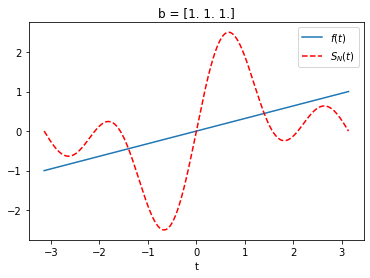

E = 25.516961847369917

Enter b (size=3) (key in '#' to stop):
0.5 0.5 0.5


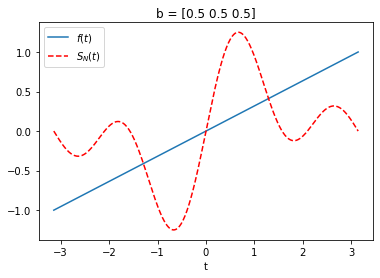

E = 14.903020017077232

Enter b (size=3) (key in '#' to stop):
0.5 0.4 0.3


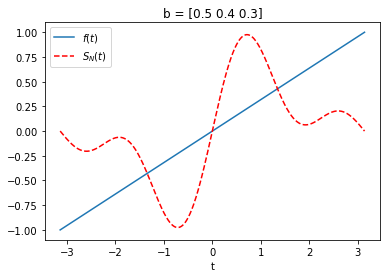

E = 12.845928582424305

Enter b (size=3) (key in '#' to stop):
#
Done!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def trial(f, N):
    M = 500
    while True:
        print("Enter b (size=%d) (key in '#' to stop):" % N)
        s = input().split()
        
        if s[0] == '#':  # key in '#' to stop the loop
            print('Done!')
            break
        
        try:
            b = np.array(s, dtype=float)
        except:
            print('Value error!\n')
        else:
            if len(s) != N:
                print('Error! The size of b should be %d!\n' % N)
            else:
                plot_compare(f, N, M, b)
                E = error(b, f, M)
                print('E =', E)
                print()

f = lambda t: 1 / np.pi *t
trial(f, 3)

(5) **Now** we shall try to automate the procedure in part (4). Write a function that has three nested loops over values of $b_1, b_2$, and $b_3$. Let each loop cover the interval $[−1, 1]$ in steps of $0.1$.

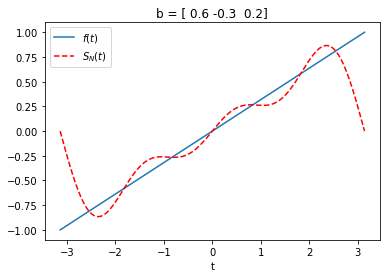

E = 5.492181424056137


In [10]:
M = 500

f = lambda t: 1 / np.pi *t

b_opt = np.array([0, 0, 0])
E_opt = error(b_opt, f, M)
for b1 in np.arange(-1, 1, 0.1):
    for b2 in np.arange(-1, 1, 0.1):
        for b3 in np.arange(-1, 1, 0.1):
            b = np.array([b1, b2, b3])
            E = error(b, f, M)
            if E < E_opt:
                E_opt = E
                b_opt = b

plot_compare(f, 3, M, b_opt)
print('E =', E_opt)

array([ 0.63661136, -0.31829306,  0.21218136])

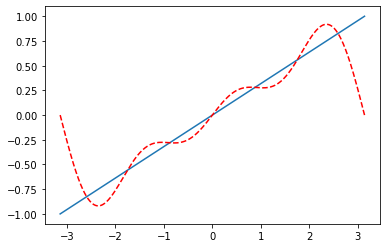

In [11]:
# use normal equation
def plot(f, N, M):
    t = np.linspace(-np.pi, np.pi, M)
    
    A = np.zeros([N,N])
    for j in range(N):
        for k in range(N):
            A[j][k] = sum(np.sin((j+1) * t) * np.sin((k+1) * t))
    
    a = np.array([sum(np.sin((k+1) * t) * f(t)) for k in range(N)])
    b = np.linalg.solve(A, a)
    
    plt.plot(t, f(t))
    plt.plot(t, sinesum(t, b), 'r--')
    return b

f = lambda t: 1 / np.pi *t
plot(f,3,500)